Enter NSE stock symbol:  silver


Mean (Average): 326.30949999999996
Mode: [326.5]
Variance: 0.11658394736842324
Standard Deviation: 0.3414439154069424
Minimum Price: 325.39
Maximum Price: 326.61


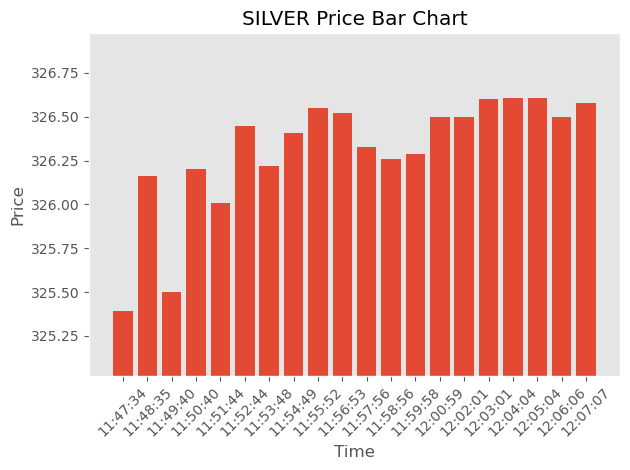

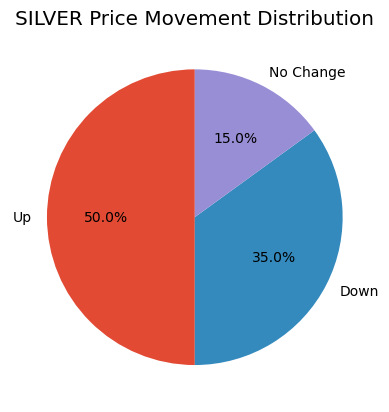

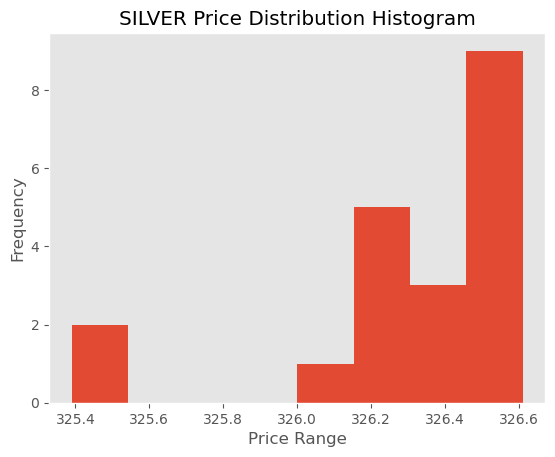

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

SYMBOL = input("Enter NSE stock symbol: ").upper()
CSV_FILE = f"{SYMBOL}_live.csv"


df = pd.read_csv(CSV_FILE)
df["price"] = pd.to_numeric(df["price"])


df = df.tail(20)

# STATISTICS
mean = df["price"].mean()
mode = df["price"].mode()
variance = df["price"].var()
std_dev = df["price"].std()
min_price = df["price"].min()
max_price = df["price"].max()

print("Mean (Average):", mean)
print("Mode:", mode.values)
print("Variance:", variance)
print("Standard Deviation:", std_dev)
print("Minimum Price:", min_price)
print("Maximum Price:", max_price)

#BAR CHART
plt.figure()
plt.bar(df["time"], df["price"])
plt.xlabel("Time")
plt.ylabel("Price")
plt.title(f"{SYMBOL} Price Bar Chart")

padding = (max_price - min_price) * 0.3
plt.ylim(min_price - padding, max_price + padding)

plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



# PIE CHART


df["diff"] = df["price"].diff()

def movement(x):
    if x > 0:
        return "Up"
    elif x < 0:
        return "Down"
    else:
        return "No Change"

df["movement"] = df["diff"].apply(movement)
movement_counts = df["movement"].value_counts()

plt.figure()
plt.pie(
    movement_counts,
    labels=movement_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"{SYMBOL} Price Movement Distribution")
plt.show()

# HISTOGRAM


plt.figure()
plt.hist(df["price"], bins=8)
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.title(f"{SYMBOL} Price Distribution Histogram")
plt.grid()
plt.show()
